# Práctica 1: Regresión Lineal/Logística

> Reyes Figueroa José María

In [1]:
#Manipulación de datos
import numpy as np 
import pandas as pd

#Visualización
import cufflinks as cf

cf.go_offline()

#Estandrización
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

#Train test split
from sklearn.model_selection import train_test_split, cross_val_score

#Regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#Métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, roc_auc_score

In [2]:
#Importación de datos

data = pd.read_excel('./datos1.xlsx')

In [3]:
data

,Marca temporal,Color primario favorito,Edad en años (numérica),Estatura en metros (numérica),Peso en kg (numérica),Tipo de personalidad,Número de vasos de agua que tomas al día (numérico),¿Día o noche?,Actividad física,Mascota favorita,¿Chile del que pica o del que no pica?,Número de hermanos (numérica),¿Las quesadillas van con queso?,Número de tatuajes (numérica),¿Team frío o team calor?
0,2024-03-16 10:04:41.993,Azul,29,1.92,107.00,Introvertido,6,Noche,¿Qué es eso?,Perrro,Del que pica,2,Con queso,0,NaN
1,2024-03-16 10:04:42.278,Azul,26,1.57,58.00,Introvertido,5,Noche,¿Qué es eso?,Perrro,Del que pica,0,Con queso,0,NaN
2,2024-03-16 10:04:48.547,Azul,25,1.71,78.00,Introvertido,3,Noche,Si,Perrro,Del que pica,1,Con queso,0,NaN
3,2024-03-16 10:04:51.113,Rojo,27,1.78,87.00,Introvertido,4,Noche,¿Qué es eso?,Perrro,Del que pica,1,Sin queso,0,NaN
4,2024-03-16 10:04:56.252,Azul,23,1.70,76.00,Introvertido,4,Noche,Si,Gato,Del que no pica,2,Con queso,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2024-09-26 18:55:14.043,Rojo,33,67.00,1.70,Extrovertido,3,Noche,Si,Gato,Del que pica,1,Con queso,11,Team frío
146,2024-09-26 18:56:07.469,Azul,26,65.00,1.65,Introvertido,2,Noche,Si,Perro,Del que no pica,1,Con queso,0,Team calor
147,2024-09-26 18:57:02.342,Rojo,24,54.00,1.58,Introvertido,8,Noche,Si,Gato,Del que pica,2,Con queso,0,Team frío
148,2024-09-26 19:36:54.638,AMARILLO,27,52.00,155.00,Extrovertido,5,Dia,Si,perros,Del que pica,4,Sin queso,0,Team frío


In [4]:
#Nuevas columnas
data = data.drop(['Marca temporal'], axis=1)
data.columns = ['colorp_fav', 'edad', 'estatura', 'peso', 'personalidad', 'vasos_al_día', 'día/noche', 'actividad_física', 'mascota_fav', 'chile','num_hermanos','quesadillas', 'num_tatuajes', 'frío/calor']

En los siguientes blocks se limpió el dataset, se corrigieron los valores de las variables como peso, estatura y se hizo una correcta asignación para las categorías de las otras variables que presentaban valores en distintos formatos.

In [5]:
#Estatura corregida

data['estatura_corregida'] = np.where(data['estatura'] > 2, data['peso'], data['estatura'])
data['estatura_corregida'] = np.where(data['estatura_corregida'] >2 , data['estatura_corregida']/100, data['estatura_corregida'])

In [6]:
#Peso corregido

data['peso_corregido'] = np.where(data['peso'] < 2, data['estatura'], data['peso'])
data['estatura_corregida'] = np.where(data['estatura_corregida'] == 0, data['estatura_corregida'].mean(), data['estatura_corregida'])

In [7]:
#Reemplazo de columnas estatura y peso

data = data.drop(['estatura', 'peso'], axis=1)

In [8]:
#Nuevas columnas
data = data[['colorp_fav','edad', 'estatura_corregida','peso_corregido','personalidad', 'vasos_al_día', 'día/noche', 'actividad_física', 'mascota_fav', 'chile','num_hermanos','quesadillas', 'num_tatuajes', 'frío/calor']]
data.rename(columns={'estatura_corregida':'estatura', 'peso_corregido':'peso'}, inplace=True)
data['peso'] = np.where(data['peso'] == data['estatura']*100, data['peso'].median(), data['peso'])

In [9]:
#Vasos al día

bye = ['10+', 'diez']
bye2 = ['2 vasotes']
data['vasos_al_día'] = np.where(data['vasos_al_día'].isin(bye), 10, data['vasos_al_día'])
data['vasos_al_día'] = np.where(data['vasos_al_día'].isin(bye2), 2, data['vasos_al_día'])

In [10]:
#Día/noche

data['día/noche'] = np.where(data['día/noche'] == 'Dia', 'Día', data['día/noche'])

In [11]:
#mascota_fav

data['mascota_fav'] = np.where(data['mascota_fav'].str.contains('err'), 'Perro', data['mascota_fav'])
dog = ['Dalmata', 'Peroo', 'PERRO']
data['mascota_fav'] = np.where(data['mascota_fav'].isin(dog), 'Perro', data['mascota_fav'])
cats = ['gato', 'Cats', 'gatos', 'michi']
data['mascota_fav'] = np.where(data['mascota_fav'].isin(cats), 'Gato', data['mascota_fav'])
data['mascota_fav'] = np.where((data['mascota_fav'] != 'Perro') & (data['mascota_fav'] != 'Gato'), 'Otros', data['mascota_fav'])

In [12]:
data['mascota_fav'].value_counts()

mascota_fav
Perro    103
Gato      40
Otros      7
Name: count, dtype: int64

In [13]:
#num_hermanos
data['num_hermanos'] = np.where(data['num_hermanos'] == 'Una', 1, data['num_hermanos'])

In [14]:
#num_tatuajes
data['num_tatuajes'] = np.where(data['num_tatuajes'] == 'Cero', 0, data['num_tatuajes'])

In [15]:
data['colorp_fav'].value_counts()

colorp_fav
Azul           74
Rojo           34
azul           11
Amarillo       10
Verde           6
negro           3
AZUL            2
Naranja         1
oro rosa        1
Morado          1
rosa            1
amarillo        1
mostaza         1
Azul marino     1
Azul cielo      1
Gris            1
AMARILLO        1
Name: count, dtype: int64

In [16]:
#Color
data['colorp_fav'] = np.where(data['colorp_fav'].str.contains('zu'), 'Azul', data['colorp_fav'])
data['colorp_fav'] = np.where(data['colorp_fav'].str.contains('ro'), 'Rojo', data['colorp_fav'])
data['colorp_fav'] = np.where(data['colorp_fav'] == 'AZUL', 'Azul', data['colorp_fav'])
y = ['amarillo', 'AMARILLO', 'mostaza']
data['colorp_fav'] = np.where(data['colorp_fav'].isin(y), 'Amarillo', data['colorp_fav'])
others = ['Verde', 'negro', 'Naranja', 'Morado', 'Gris']
data['colorp_fav'] = np.where(data['colorp_fav'].isin(others), 'Otros', data['colorp_fav'])

Se definió una función para detectar valores nulos, teniendo como resultado solo en los datos de peso y frío/calor (Team frío o Team calor). Para el peso se imputó la mediana, mientras que para la variable de frío/calor se realizaron dos procesos que más adelante se muestran en el código. Para la regresión lineal con la variable target de la estatura, se imputó la mediana de los valores en esta variable, mientras que para la regresión logística sobre la variable target Team Frío o Team Calor, se entrenó un modelo con los datos no nulos del dataset y se evaluó sobre los registros con la etiqueta faltante.

In [17]:
#Valores nulos

def nulos(df):
    return df.isnull().sum().sort_values(ascending = False)#/len(df) * 100


In [18]:
nulos(data)

frío/calor          14
peso                12
colorp_fav           0
edad                 0
estatura             0
personalidad         0
vasos_al_día         0
día/noche            0
actividad_física     0
mascota_fav          0
chile                0
num_hermanos         0
quesadillas          0
num_tatuajes         0
dtype: int64

In [19]:
data['peso']=data['peso'].fillna(data['peso'].median())

## Regresión lineal: estatura

In [20]:
reg = data.copy()

Se reasignó la clasificación de variables binarias a 0 y 1, así como reasignación de categorías a otras variables con más de dos opciones de respuesta.

In [21]:
#Variables binarias
reg['frío/calor'] = np.where(reg['frío/calor'] == 'Team frío', 1, reg['frío/calor'])
reg['frío/calor'] = np.where((reg['frío/calor'] != 1) & (reg['frío/calor'].isnull() == False), 0, reg['frío/calor'])
reg['frío/calor'] = reg['frío/calor'].fillna(reg['frío/calor'].median())
reg['actividad_física'] = np.where(reg['actividad_física'] == 'No', '¿Qué es eso?', reg['actividad_física'])
reg['personalidad'] = np.where(reg['personalidad'] == 'Introvertido', 1, 0)
reg['día/noche'] = np.where(reg['día/noche'] == 'Día', 1, 0)
reg['chile'] = np.where(reg['chile'] == 'Del que pica', 1, 0)
reg['quesadillas'] = np.where(reg['quesadillas'] == 'Con queso', 1, 0)
reg['actividad_física'] = np.where(reg['actividad_física'] == '¿Qué es eso?', 0, 1)

In [22]:
#Bins de vasos al día [0,4), [4,8), [8,12), [12+]

reg['vasos_al_día'] = pd.cut(reg['vasos_al_día'], bins=[0,3,7,11,100], labels=['0-3', '4-7', '8-11', '12+'])

In [23]:
#Bins numero de tatuajes [0], [1,2], [3,6] [7+]

reg['num_tatuajes'] = pd.cut(reg['num_tatuajes'], bins=[-1,0,2,6,100], labels=['0', '1-2', '3-6', '7+'])

In [24]:
#Bins hermanos [0], [1,2], [3+]

reg['num_hermanos'] = pd.cut(reg['num_hermanos'], bins=[-1,0,2,100], labels=['0', '1-2', '3+'])

In [25]:
reg

,colorp_fav,edad,estatura,peso,personalidad,vasos_al_día,día/noche,actividad_física,mascota_fav,chile,num_hermanos,quesadillas,num_tatuajes,frío/calor
0,Azul,29,1.92,107.0,1,4-7,0,0,Perro,1,1-2,1,0,1.0
1,Azul,26,1.57,58.0,1,4-7,0,0,Perro,1,0,1,0,1.0
2,Azul,25,1.71,78.0,1,0-3,0,1,Perro,1,1-2,1,0,1.0
3,Rojo,27,1.78,87.0,1,4-7,0,0,Perro,1,1-2,0,0,1.0
4,Azul,23,1.70,76.0,1,4-7,0,1,Gato,0,1-2,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Rojo,33,1.70,67.0,0,0-3,0,1,Gato,1,1-2,1,7+,1.0
146,Azul,26,1.65,65.0,1,0-3,0,1,Perro,0,1-2,1,0,0.0
147,Rojo,24,1.58,54.0,1,8-11,0,1,Gato,1,1-2,1,0,1.0
148,Amarillo,27,1.55,76.0,0,4-7,1,1,Perro,1,3+,0,0,1.0


In [26]:
#One hot encoding (Variables dummies)

reg = pd.get_dummies(reg, columns=['colorp_fav', 'mascota_fav', 'vasos_al_día', 'num_hermanos', 'num_tatuajes'])
reg = reg*1

### EDA

In [27]:
#Variables

varc = ['edad', 'peso']
target = ['estatura']
vard = [c for c in reg.columns if c not in varc + target]

In [28]:
#Histograma de varc

for v in varc:
    reg[v].iplot(kind='hist', bins=30, xTitle=v, linecolor='black', yTitle='Frecuencia', title='Histograma de '+v)

In [29]:
#Plots vard

for v in vard:
    reg[v].iplot(kind='hist', bins=30, xTitle=v, linecolor='black', yTitle='Frecuencia', title='Histograma de '+v)

In [30]:
reg.columns

Index(['edad', 'estatura', 'peso', 'personalidad', 'día/noche',
       'actividad_física', 'chile', 'quesadillas', 'frío/calor',
       'colorp_fav_Amarillo', 'colorp_fav_Azul', 'colorp_fav_Otros',
       'colorp_fav_Rojo', 'mascota_fav_Gato', 'mascota_fav_Otros',
       'mascota_fav_Perro', 'vasos_al_día_0-3', 'vasos_al_día_4-7',
       'vasos_al_día_8-11', 'vasos_al_día_12+', 'num_hermanos_0',
       'num_hermanos_1-2', 'num_hermanos_3+', 'num_tatuajes_0',
       'num_tatuajes_1-2', 'num_tatuajes_3-6', 'num_tatuajes_7+'],
      dtype='object')

In [31]:
reg['edad'] = np.where(reg['edad'] == 'Veinticinco ', 25, reg['edad'])

In [32]:
#Estandarización

scaler = StandardScaler()
reg[varc] = scaler.fit_transform(reg[varc])

In [33]:
#SelectKBest

X = reg[vard+varc]
y = reg[target]
kb = SelectKBest(k='all', score_func=f_regression)
kb.fit(X, y)

/Users/josemariareyesfigueroa/.julia/conda/3/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectKBest(k='all', score_func=<function f_regression at 0x7fd69ec5f310>)

In [34]:
scores = pd.DataFrame(kb.scores_, index=X.columns, columns=['score']).sort_values(by='score', ascending=False)
scores

,score
peso,372.108308
colorp_fav_Amarillo,13.274556
mascota_fav_Gato,5.421626
edad,5.235443
num_hermanos_1-2,3.802272
chile,3.626402
mascota_fav_Perro,2.674337
num_hermanos_0,2.381808
mascota_fav_Otros,1.529628
num_hermanos_3+,1.423371


Después de la selección de SelectKBest, el peso es por mucho la variable con mayor poder predictivo para la estatura.

In [35]:
best = scores[scores['score'] > 5].index
best

Index(['peso', 'colorp_fav_Amarillo', 'mascota_fav_Gato', 'edad'], dtype='object')

In [36]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(reg[['peso']], reg[target], test_size=0.2, random_state=42)

In [37]:
#Linear model

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5291645446472735

In [38]:
#Cross validation

ls_res = cross_val_score(X = X_train, y = y_train, estimator = lr, cv = 5, scoring = 'r2', n_jobs = -1)

In [39]:
ls_res

array([0.82083258, 0.5347699 , 0.60007926, 0.87074933, 0.48304192])

In [40]:
#Test score

lr.score(X_test, y_test)

0.5291645446472735

In [41]:
#Predicción

y_pred = lr.predict(X_test)
y_pred

array([[1.64839993],
       [1.64235427],
       [1.69676523],
       [1.7814045 ],
       [1.64839993],
       [1.65444559],
       [1.84790679],
       [1.66653692],
       [1.70281089],
       [1.74513053],
       [1.62421728],
       [1.70281089],
       [1.70281089],
       [1.62421728],
       [1.78745016],
       [1.74513053],
       [1.76931318],
       [1.62421728],
       [1.70281089],
       [1.66653692],
       [1.67862824],
       [1.70281089],
       [1.60608029],
       [1.66653692],
       [1.59398897],
       [1.64839993],
       [1.58794331],
       [1.66653692],
       [1.77535884],
       [1.70281089]])

El modelo se probó con todas las variables, con las 5, 10 y 15 mejores variables sin emabargo, el mejor desempeño se tuvo considerando el peso como úncia variable.

In [42]:
#Métricas

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)
print('R2:', r2)

MSE: 0.0031949828656545696
RMSE: 0.056524179477941736
MAE: 0.03681676284568277
MAPE: 0.021443893793796028
R2: 0.5291645446472735


Para el MSE, su valor indica que, en promedio, el error cuadrático del modelo es pequeño, pero la interpretación directa no es intuitiva, ya que se encuentra en las unidades cuadradas del target.

Para el RMSE, su valor sugiere que el error promedio del modelo es aproximadamente 0.0565. (m unidades de target)

El valor del MAE indica que en promedio, las predicciones del modelo están a una distancia de 0.0368 unidades del valor real.

Para el MAPE significa que el error promedio del modelo es del 2.14% en comparación con los valores reales.

Y finalmente para el R2, su valor cercano a 0.5 indica que aproximadamente el 52.9% de la variabilidad en los datos es explicada por el modelo. Lo cual no es tan deseable y puede mejorar con otras variables, mayor cantidad de datos o distinta clasficiación de variables.

## Regresión Logística: Team Frío/Team Calor

In [43]:
reglog = data.copy()

Se hace un proceso de clasificación similar al de la regresión lineal:

In [44]:
reglog['edad'] = np.where(reglog['edad'] == 'Veinticinco ', 25, reglog['edad'])

In [45]:
reglog['actividad_física'] = np.where(reglog['actividad_física'] == '¿Qué es eso?', 'No', reglog['actividad_física'])

In [46]:
#Bins vasos_al_día [0,4), [4,8), [8,12), [12+]

reglog['vasos_al_día'] = pd.cut(reglog['vasos_al_día'], bins=[0,3,7,11,100], labels=['0-3', '4-7', '8-11', '12+'])

#Bins num_tatuajes [0], [1,2], [3,6], [7+]

reglog['num_tatuajes'] = pd.cut(reglog['num_tatuajes'], bins=[-1,0,2,6,100], labels=['0', '1-2', '3-6', '7+'])

#Bins num_hermanos [0], [1,2], [3+]

reglog['num_hermanos'] = pd.cut(reglog['num_hermanos'], bins=[-1,0,2,100], labels=['0', '1-2', '3+'])

In [47]:
reglog

,colorp_fav,edad,estatura,peso,personalidad,vasos_al_día,día/noche,actividad_física,mascota_fav,chile,num_hermanos,quesadillas,num_tatuajes,frío/calor
0,Azul,29,1.92,107.0,Introvertido,4-7,Noche,No,Perro,Del que pica,1-2,Con queso,0,NaN
1,Azul,26,1.57,58.0,Introvertido,4-7,Noche,No,Perro,Del que pica,0,Con queso,0,NaN
2,Azul,25,1.71,78.0,Introvertido,0-3,Noche,Si,Perro,Del que pica,1-2,Con queso,0,NaN
3,Rojo,27,1.78,87.0,Introvertido,4-7,Noche,No,Perro,Del que pica,1-2,Sin queso,0,NaN
4,Azul,23,1.70,76.0,Introvertido,4-7,Noche,Si,Gato,Del que no pica,1-2,Con queso,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Rojo,33,1.70,67.0,Extrovertido,0-3,Noche,Si,Gato,Del que pica,1-2,Con queso,7+,Team frío
146,Azul,26,1.65,65.0,Introvertido,0-3,Noche,Si,Perro,Del que no pica,1-2,Con queso,0,Team calor
147,Rojo,24,1.58,54.0,Introvertido,8-11,Noche,Si,Gato,Del que pica,1-2,Con queso,0,Team frío
148,Amarillo,27,1.55,76.0,Extrovertido,4-7,Día,Si,Perro,Del que pica,3+,Sin queso,0,Team frío


In [48]:
#Binarias

reglog['personalidad'] = np.where(reglog['personalidad'] == 'Introvertido', 1, 0)
reglog['día/noche'] = np.where(reglog['día/noche'] == 'Día', 1, 0)
reglog['actividad_física'] = np.where(reglog['actividad_física'] == 'No', 0, 1)
reglog['chile'] = np.where(reglog['chile'] == 'Del que pica', 1, 0)
reglog['quesadillas'] = np.where(reglog['quesadillas'] == 'Con queso', 1, 0)

In [49]:
reglog

,colorp_fav,edad,estatura,peso,personalidad,vasos_al_día,día/noche,actividad_física,mascota_fav,chile,num_hermanos,quesadillas,num_tatuajes,frío/calor
0,Azul,29,1.92,107.0,1,4-7,0,0,Perro,1,1-2,1,0,NaN
1,Azul,26,1.57,58.0,1,4-7,0,0,Perro,1,0,1,0,NaN
2,Azul,25,1.71,78.0,1,0-3,0,1,Perro,1,1-2,1,0,NaN
3,Rojo,27,1.78,87.0,1,4-7,0,0,Perro,1,1-2,0,0,NaN
4,Azul,23,1.70,76.0,1,4-7,0,1,Gato,0,1-2,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Rojo,33,1.70,67.0,0,0-3,0,1,Gato,1,1-2,1,7+,Team frío
146,Azul,26,1.65,65.0,1,0-3,0,1,Perro,0,1-2,1,0,Team calor
147,Rojo,24,1.58,54.0,1,8-11,0,1,Gato,1,1-2,1,0,Team frío
148,Amarillo,27,1.55,76.0,0,4-7,1,1,Perro,1,3+,0,0,Team frío


In [50]:
#One hot encoding

reglog = pd.get_dummies(reglog, columns=['colorp_fav', 'vasos_al_día', 'mascota_fav','num_hermanos', 'num_tatuajes'])
reglog = reglog*1

In [51]:
reglog

,edad,estatura,peso,personalidad,día/noche,actividad_física,chile,quesadillas,frío/calor,colorp_fav_Amarillo,...,mascota_fav_Gato,mascota_fav_Otros,mascota_fav_Perro,num_hermanos_0,num_hermanos_1-2,num_hermanos_3+,num_tatuajes_0,num_tatuajes_1-2,num_tatuajes_3-6,num_tatuajes_7+
0,29,1.92,107.0,1,0,0,1,1,NaN,0,...,0,0,1,0,1,0,1,0,0,0
1,26,1.57,58.0,1,0,0,1,1,NaN,0,...,0,0,1,1,0,0,1,0,0,0
2,25,1.71,78.0,1,0,1,1,1,NaN,0,...,0,0,1,0,1,0,1,0,0,0
3,27,1.78,87.0,1,0,0,1,0,NaN,0,...,0,0,1,0,1,0,1,0,0,0
4,23,1.70,76.0,1,0,1,0,1,NaN,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,33,1.70,67.0,0,0,1,1,1,Team frío,0,...,1,0,0,0,1,0,0,0,0,1
146,26,1.65,65.0,1,0,1,0,1,Team calor,0,...,0,0,1,0,1,0,1,0,0,0
147,24,1.58,54.0,1,0,1,1,1,Team frío,0,...,1,0,0,0,1,0,1,0,0,0
148,27,1.55,76.0,0,1,1,1,0,Team frío,1,...,0,0,1,0,0,1,1,0,0,0


In [52]:
reglog['frío/calor'] = np.where(reglog['frío/calor'] == 'Team frío', 1, reglog['frío/calor'])
reglog['frío/calor'] = np.where(reglog['frío/calor'] == 'Team calor', 0, reglog['frío/calor'])

### Entrenamiento del modelo

In [53]:
#Conjuntos

Xt = reglog[reglog['frío/calor'].isnull() == False]
xt = reglog[reglog['frío/calor'].isnull() == True] 

In [54]:
#Variables

varc = ['edad', 'estatura','peso']
target = ['frío/calor']
vard = [c for c in reglog.columns if c not in varc + target]

In [55]:
#Cambia frío/calor de Xt a boolean

Xt['frío/calor'] = Xt['frío/calor'].astype('bool')

In [56]:
Xt['frío/calor'] = Xt['frío/calor']*1

In [57]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(Xt[vard+varc], Xt[target], test_size=0.2, random_state=42)

#Logistic regression

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipe.fit(X_train, y_train)

/Users/josemariareyesfigueroa/.julia/conda/3/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [58]:
# Cross validation

ls_res = cross_val_score(X = X_train, y = y_train, estimator = pipe, cv = 5, scoring = 'roc_auc', n_jobs = -1)

In [59]:
ls_res

array([0.61111111, 0.78947368, 0.35087719, 0.75925926, 0.85185185])

In [60]:
ls_res.mean(), ls_res.std()

(0.6725146198830411, 0.17921323792166674)

El tercer elemento del cross validation indica que existe gran variabilidad entre los modelos, el hecho de que la media de estos datos sea de 0.662 sugiere que el rendimiento promedio del modelo es de 66.18%, lo cual sugiere que, en general, el modelo es capaz de predecir correctamente aproximadamente el 66.18% de las veces, por encima de 0.5 por poco. Además que la std sea de 0.17 muestra un valor bastante alto, lo que indica que el rendimiento del modelo varía significativamente entre las distintas particiones de los datos. Un valor alto en la desviación estándar es una señal de que el modelo no está generalizando bien en todas las muestras.

In [61]:
#Performance test

y_train.mean(), y_test.mean()

(frío/calor    0.851852
 dtype: float64,
 frío/calor    0.714286
 dtype: float64)

In [62]:
#Métricas de performance

roc_auc_score(y_test, y_score=pipe.predict(X_test))

0.5

In [63]:
#Accuracy, Sensitivity, Specificity

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = pipe.predict(X_test)

accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Accuracy:', accuracy_score(y_test, y_pred))

Sensitivity: 1.0
Specificity: 0.0
Accuracy: 0.7142857142857143


Con estos valores se puede concluir lo siguiente:

ROC AUC de 0.625: El modelo tiene una capacidad moderada para diferenciar entre clases de team calor y team frío, pero podría mejorarse.
Sensibilidad de 1.0: El modelo está identificando perfectamente todos los casos Team frío.
Especificidad de 0.25: El modelo tiene un gran problema al identificar los casos Team calor.
Accuracy de 0.7857: Aunque la precisión es razonablemente alta, está sesgada por el buen desempeño en la clasificación de los casos de Team frío.

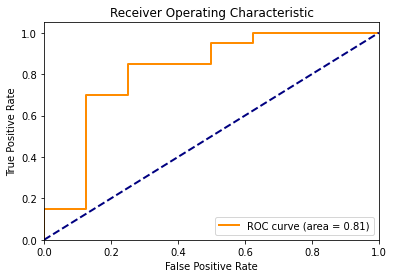

In [64]:
from sklearn.metrics import roc_curve, auc

#Gráfica de roc

import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()